In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from math import sqrt

In [22]:
#pd_data_train = pd.read_excel('../Dataset/randomized data training.xlsx')
#pd_data_test = pd.read_excel('../Dataset/randomized data testing.xlsx')
pd_data_train = pd.read_csv('../Dataset/training.csv')
pd_data_test = pd.read_csv('../Dataset/testing.csv')

In [23]:
np_data_train = np.array(pd_data_train)
np_data_test = np.array(pd_data_test)

In [24]:
X_train = np_data_train[:,:4]
Y_train = np_data_train[:,4:]

X_test = np_data_test[:,:4]
Y_test = np_data_test[:,4:]

In [25]:
X_plot = np.array(["Order 2", "Order 3", "Order 4", "Order 5", "Order 6", "Order 7", "Order 8","Order 9"])
Y_plot = np.array([])

# Non linear regression using Polynomial Order 2 to 9

In [7]:
for deg in range(2,10):
    poly_regressor = PolynomialFeatures(degree = deg)
    X_poly = poly_regressor.fit_transform(X_train)
    
    linear_regressor_poly = LinearRegression()
    linear_regressor_poly.fit(X_poly, Y_train)
    
    # Prediction for test set
    Y_pred = linear_regressor_poly.predict(poly_regressor.fit_transform(X_test))
    
    #Root mean square for Linear regression
    rms_non_linear = sqrt(mean_squared_error(Y_test, Y_pred))
    print(rms_non_linear)
    
    #Append to Plotting array Y axis
    Y_plot = np.append(Y_plot,rms_non_linear)

0.5189852967454749
0.3977065635166179
0.3308626997168317
0.2850191315451058
0.23748577494103418
0.2290742373170716
0.21126333504252146
0.1999584367553628


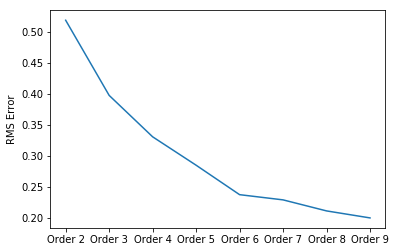

In [8]:
plt.ylabel('RMS Error')
plt.plot(X_plot,Y_plot)

# Using Polynomial Order 8 for Non Linear Regression

In [26]:
# To get Mathematical model for Non linear equation with degree 8

poly_regressor = PolynomialFeatures(degree = 8)
X_poly = poly_regressor.fit_transform(X_train)
    
linear_regressor_poly = LinearRegression()
linear_regressor_poly.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Save Model

In [27]:
from sklearn.externals import joblib

In [28]:
joblib.dump(linear_regressor_poly, 'saved_model_linregress_poly.pkl')

['nonlinear_order8_model.pkl']

# Load Model

In [12]:
linear_regressor_poly = joblib.load('saved_model_linregress_poly.pkl')

# Get coefficients and Formula

In [7]:
print("8 order Polynomial X matrix has shape -",X_poly.shape)

print("\n 1 intercept and {0} number of coefficients in model".format(linear_regressor_poly.coef_.shape[1]))


8 order Polynomial X matrix has shape - (420000, 495)

 1 intercept and 495 number of coefficients in model


### Non Linear Formula

In [7]:
feature_names = poly_regressor.get_feature_names(['K','Psi','Th','SV'])

In [10]:
formula = "{0}".format(linear_regressor_poly.intercept_[0])  # initialize formula string with intercept

# Concatenating products of coefficient * Features
for x in range(len(feature_names)):
  
    if linear_regressor_poly.coef_[0][x] < 0:
        term = ' {0}*{1}'
    else:    
        term = ' +{0}*{1}'
    
    formula+=term.format(linear_regressor_poly.coef_[0][x], feature_names[x].replace(' ','*'))  
    
print(formula)

-747.451732207533 -9.193762111979458e-10*1 +2.7392723105934068e-11*K +1.9162942392745187e-11*Psi +2.4785836209088727e-11*Th +4.664819696698068e-12*SV +1.1925068485075404e-11*K^2 +9.008528639046202e-12*K*Psi +6.408893834272435e-12*K*Th +5.293818098632042e-12*K*SV +4.763533708288684e-12*Psi^2 -4.178577510683023e-12*Psi*Th +9.43574808494392e-12*Psi*SV +1.0072203763151326e-11*Th^2 -8.08360435109005e-13*Th*SV +3.803688334189705e-12*SV^2 +4.896674555116457e-12*K^3 -5.950598131345048e-12*K^2*Psi +8.354080227397156e-12*K^2*Th -2.480815266629072e-12*K^2*SV +3.01195148268874e-12*K*Psi^2 -2.7557552588139225e-12*K*Psi*Th +2.1995023678273507e-12*K*Psi*SV +3.032392917590857e-12*K*Th^2 -2.7823672374715245e-12*K*Th*SV -2.143312400094039e-12*K*SV^2 -2.466472213826259e-12*Psi^3 -3.2444817383606634e-12*Psi^2*Th -1.1843754104325744e-12*Psi^2*SV +1.1047969799511107e-12*Psi*Th^2 -1.0974064490368363e-12*Psi*Th*SV +4.459262032542245e-14*Psi*SV^2 -3.3167447330634735e-12*Th^3 +9.615152401023001e-13*Th^2*SV +1.5

# Predict using 8 order model

In [9]:
Y_pred = linear_regressor_poly.predict(poly_regressor.fit_transform(X_test))

In [20]:
Ys = linear_regressor_poly.predict(poly_regressor.fit_transform([[353.15, 100.0, 0.0374257581, 438.2192984642]]))
Ys

array([[95.78210385]])

In [10]:
#Root mean square for Linear regression
rme = sqrt(mean_squared_error(Y_test, Y_pred))
print(rme)

0.21126333504252146


# Calculate Percentage of Accuracy Measure

In [13]:
threshold_errors = [0.5,1,2,3,4,5]
perc_acc_measure = []

In [14]:
N = Y_test.shape[0]   # Total number of examples in testing data set


for t in threshold_errors:
    
    count = 0
    
    for i in range(Y_test.shape[0]):
        
        if( abs(Y_pred[i] - Y_test[i]) < t ):
            count += 1
            
    perc_acc_measure.append(count / N)
    
        

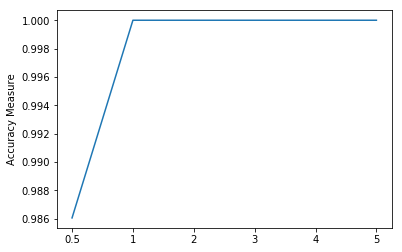

In [15]:
plt.ylabel('Accuracy Measure')
plt.plot(['0.5','1','2','3','4','5'],perc_acc_measure)

# Calculate P value

### Following steps to calculate P-value from https://www.wikihow.com/Calculate-P-Value

In [16]:
# Consider number of variables as 4
# Therefore Degree of Freedom = 4 - 1 = 3

dof = 3

In [17]:
# Calculate Chi-Square

chi_sq = (Y_pred - Y_test)**2 / Y_test

print("Chi Square - ", chi_sq.sum())

Chi Square -  246.2766158284557


# Calculate T statistic

In [18]:
import scipy.stats as st

In [19]:
st.ttest_ind(Y_pred,Y_test,equal_var=False)

Ttest_indResult(statistic=array([0.08598129]), pvalue=array([0.93148131]))